In [7]:
import pandas
import numpy
import matplotlib.pyplot as plt

class DataPreparation:
	def __init__(self, csv_path):
		"""
		Cette classe prend en entrée un chemin de fichier csv.
		Elle split le jeu de donnée en 2 bases 
		+ une train 75 %
		+ une test 25 %
		Ce 2 bases, la classe va les splits en 2 

		+ un vecteur x (qui contient les indexs temporels)
		+ un vecteyr y (qui contient les valeurs à prédire)
		En tout cette va extraire 4 arrays.
		x_train
		y_train
		x_test
		y_test
		"""
		self.dataset_df = pandas.read_csv(csv_path,sep=',')

		self.prepare_data()

	def prepare_data(self):
		number_of_rows = len(self.dataset_df)
		self.dataset_df["index_mesure"] = numpy.arange(0, number_of_rows, 1)

		self.dataset_df["Years"] = pandas.to_datetime(self.dataset_df["Years"])
		self.dataset_df["Years_name"] = self.dataset_df["Years"].dt.month_name()
		boolean_df = pandas.get_dummies(self.dataset_df["Years_name"])

		self.dataset_df = pandas.concat([self.dataset_df, boolean_df], axis=1)


		self.dataset_train_df = self.dataset_df.iloc[ : int(number_of_rows*0.75)]
		self.dataset_test_df = self.dataset_df.iloc[int(number_of_rows*0.75): ]

		self.x_train = self.dataset_train_df[['index_mesure'] + list(boolean_df.columns)].values
		self.y_train = self.dataset_train_df[['Sales']].values

		self.x_test = self.dataset_test_df[['index_mesure'] + list(boolean_df.columns)].values
		self.y_test = self.dataset_test_df[['Sales']].values


	def show_graph(self):
		plt.figure(figsize=(15, 6))
		plt.plot(self.dataset_df["Years"], self.dataset_df["Sales"], "o:")
		plt.show()

In [4]:
    from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy

class Regression:
	def __init__(self, data_preparation_object):
		self.data_preparation_object = data_preparation_object
		self.model = LinearRegression()

		self.model.fit(data_preparation_object.x_train, data_preparation_object.y_train)

		y_train_predicted = self.model.predict(data_preparation_object.x_train)
		mean_train_absolute_error = numpy.mean(numpy.abs(y_train_predicted - data_preparation_object.y_train))
		print(f"sur le jeu de train : {mean_train_absolute_error=:.2f}")


		y_test_predicted = self.model.predict(data_preparation_object.x_test)
		mean_test_absolute_error = numpy.mean(numpy.abs(y_test_predicted - data_preparation_object.y_test))
		print(f"sur le jeu de test : {mean_test_absolute_error=:.2f}")

		self.show_model_predictions(y_train_predicted, y_test_predicted)

	def show_model_predictions(self, y_train_predicted, y_test_predicted):
		plt.figure(figsize=(15, 6))
		plt.plot(self.data_preparation_object.dataset_train_df["Years"], self.data_preparation_object.y_train, "bo:")# vt
		plt.plot(self.data_preparation_object.dataset_train_df["Years"], y_train_predicted,"b") # prediction
		plt.plot(self.data_preparation_object.dataset_test_df["Years"], self.data_preparation_object.y_test, "ro:") # vt
		plt.plot(self.data_preparation_object.dataset_test_df["Years"], y_test_predicted, "r") # prediction
		plt.show()


sur le jeu de train : mean_train_absolute_error=28.42
sur le jeu de test : mean_test_absolute_error=39.80


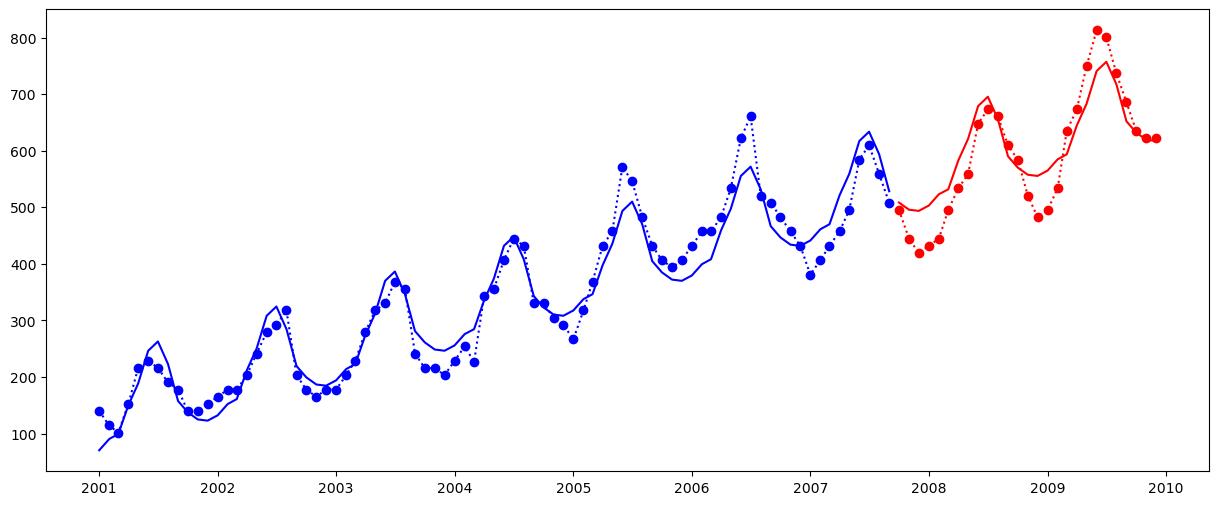

In [6]:

csv_path = "./vente_maillots_de_bain.csv"
data_preparation_object = DataPreparation(csv_path)
regression_object = Regression(data_preparation_object)

